In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

**8. This question involves the use of simple linear regression on the Auto
data set.**

**(a) Use the lm() function to perform a simple linear regression with
mpg as the response and horsepower as the predictor. Use the
summary() function to print the results. Comment on the output.**

In [2]:
Auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
results_smf = smf.ols('mpg ~ horsepower',data = Auto).fit()
results_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           7.03e-81
Time:                        16:59:34   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**i. Is there a relationship between the predictor and the response?**

In [4]:
results_smf.f_pvalue

7.031989029403965e-81

In [5]:
results_smf.pvalues

Intercept     1.220362e-187
horsepower     7.031989e-81
dtype: float64

从results_smf.summary()中F-statistic拒绝零假设（null hypothes），且horsepower_float的系数P值也拒绝了零假设（null hypothes），可见预测变量与相应变量相关。

**ii. How strong is the relationship between the predictor and
the response?**

In [6]:
print('RSE: ', results_smf.mse_resid ** 0.5)
print('mpg_avrage:',Auto['mpg'].mean())
print('RSE/mpg_avrage:',results_smf.mse_resid ** 0.5/Auto['mpg'].mean())
print('R2: ', results_smf.rsquared)

RSE:  4.90575691954594
mpg_avrage: 23.445918367346938
RSE/mpg_avrage: 0.20923714066914834
R2:  0.6059482578894348


两种讨论测量模型经度方法，1.RSE估计了响应偏离总体回归直线的标准差，mpg数据集的RSE为4.91单元，而响应变量平均值为23.45，误差百分比约为21%；2.R^2统计量记录了预测变量解释的响应变量变异的百分比，该预测解释了61%的销售方差。

**iii. Is the relationship between the predictor and the response
positive or negative?**

In [7]:
results_smf.params.horsepower

-0.15784473335365368

In [8]:
results_smf.params.horsepower > 0

False

从results_smf.summary()中的horsepower_float的coef可见horsepower_float回归系数为-0.16与响应变量负相关。

**iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95% confidence and prediction
intervals?**

In [9]:
#statsmodels方案
X = Auto['horsepower']
y = Auto['mpg']
X_model = sm.add_constant(X)
results = sm.OLS(y, X_model).fit()
#以下为利用statsmodels中的OLSResults.get_prediction实现
X_predict = np.c_[1,98]
predict_test = sm.regression.linear_model.OLSResults.get_prediction(results,exog=X_predict)
sm.regression.linear_model.PredictionResults.summary_frame(predict_test)

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


预测值为24.467，95%置信区间为（23.973079，24.961075），95%预测区间为（14.809396，34.124758）

**(b) Plot the response and the predictor. Use the abline() function
to display the least squares regression line.**

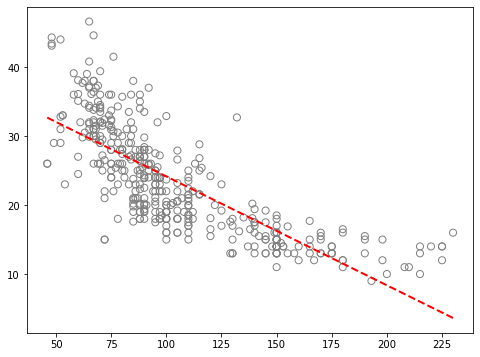

In [10]:
#同上面理由使用了statsmodels方案
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='', marker='o', edgecolors='gray', s=50)
X_draw = np.linspace(X.min(), X.max(), 50)
plt.plot(X_draw, results.predict(np.c_[[1]*50,X_draw]),'red',linewidth= 2,linestyle='--')
plt.show()

**(c) Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.**

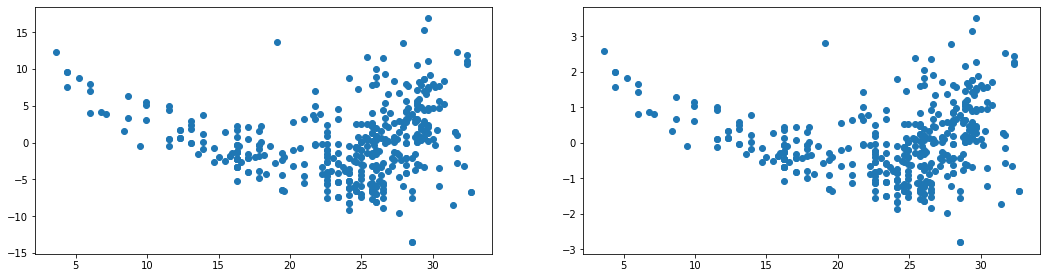

In [11]:
from statsmodels.stats.outliers_influence import OLSInfluence
results_Influence = OLSInfluence(results_smf)
#通过summary_frame查看变量相关的一些统计特征，可以用dir(results_Influence)查看所有属性和方法
plt.figure(figsize=(18,10))
plt.subplot(221)
plt.scatter(results_smf.predict(),results_smf.resid)
plt.subplot(222)
plt.scatter(results_smf.predict(),results_Influence.resid_studentized_external)
plt.show()

残差图表征了明显的非线性

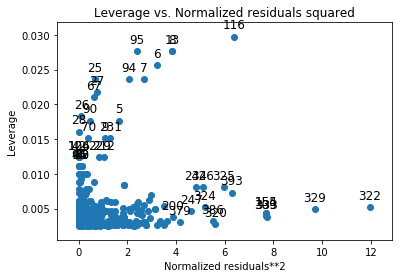

In [12]:
#statsmodels绘制杠杆等级，横轴为方差（代表离散情况），竖轴为杠杆等级
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig = plot_leverage_resid2(results_smf)

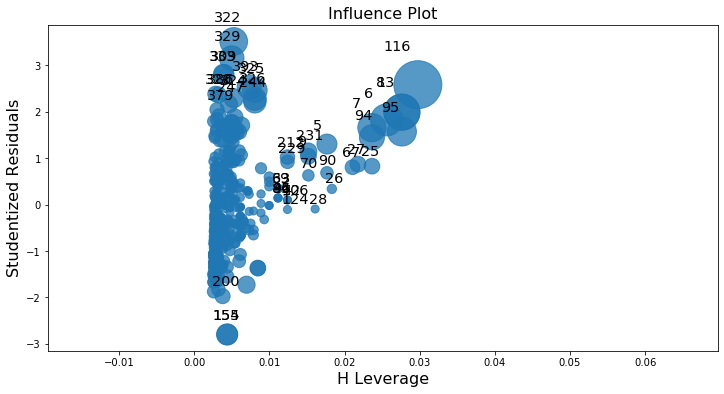

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
fig = sm.graphics.influence_plot(results, ax=ax)
plt.show()

116为最大杠杆点，322为最大离散点

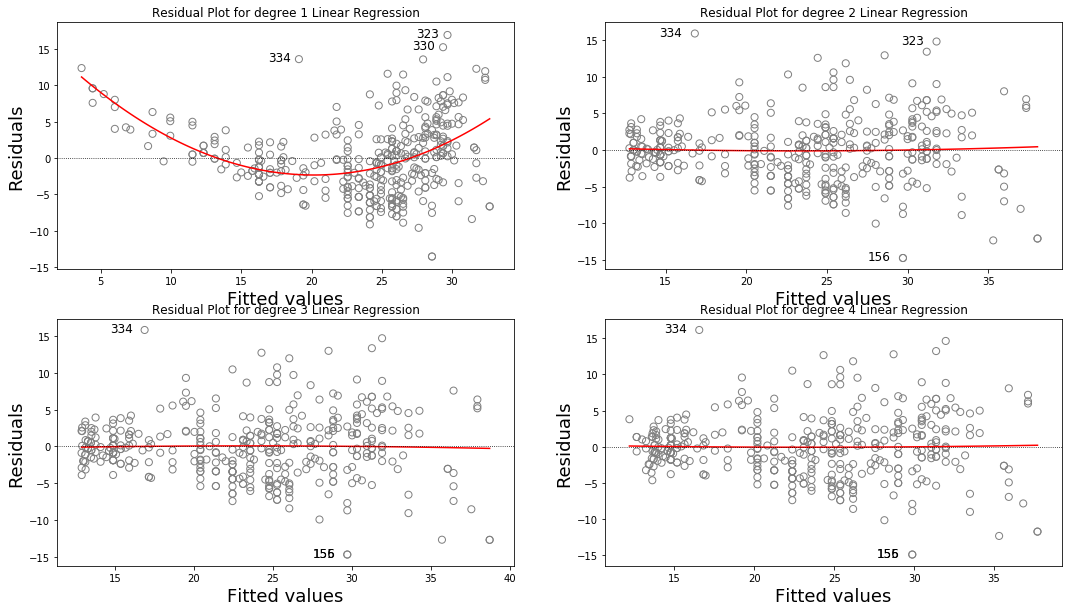

In [14]:
#sklearn的残差图函数编写，实现了原文中的几个函数（为什么不用statsmodels实现，个人觉得PolynomialFeatures拟合高次项方便）
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
def plot_Residuals(X_in , y_in,degree_in = 1,degree_Residuals = 2,tap_show = False):    
    poly_features_in = PolynomialFeatures(degree = degree_in,include_bias=False)
    X_degree_in = poly_features_in.fit_transform(np.c_[X_in])
    lin_in = linear_model.LinearRegression()
    lin_in.fit(X_degree_in,y_in)
    y_predict = pd.Series(lin_in.predict(X_degree_in ),index = y_in.index)
    y_Residuals = y_in - y_predict
    poly_features_Residuals = PolynomialFeatures(degree = degree_Residuals,include_bias=False)
    y_predict_poly = poly_features_Residuals.fit_transform(np.c_[y_predict])
    lin_Residuals = linear_model.LinearRegression()
    lin_Residuals.fit(np.c_[y_predict_poly],np.c_[y_Residuals])
    X_new = np.linspace(y_predict.min(), y_predict.max(), 100).reshape(100, 1)
    X_new_poly = poly_features_Residuals.fit_transform(X_new)
    y_new_predict = lin_Residuals.predict(X_new_poly)
    plt.plot(X_new,y_new_predict, "red")
    plt.scatter(y_predict,y_Residuals,color='', marker='o', edgecolors='gray', s=50)
    plt.xlabel("Fitted values", fontsize=18)
    plt.ylabel("Residuals", fontsize=18)
    plt.axhline(y=0,linewidth= 0.8,color = 'black',linestyle=':' )
    if tap_show == True:
        tap_1,tap_2,tap_3 = np.abs(y_Residuals).sort_values(ascending=False).index[:3]
        plt.text(y_predict[tap_1] -2.2, y_Residuals[tap_1] - 0.3, str(tap_1 + 1), fontsize=12, color="black")
        plt.text(y_predict[tap_2] -2.2, y_Residuals[tap_2] - 0.3, str(tap_2 + 1), fontsize=12, color="black")
        plt.text(y_predict[tap_3] -2.2 , y_Residuals[tap_3] - 0.3, str(tap_3 + 1), fontsize=12, color="black") 

#绘图,可以看出高次拟合后，残差图改善，但原书中 which.max(hatvalues (lm.fit))为375，图形显现372为离群点
plt.figure(figsize=(18,10))
for i in range(1,5):
    pic_num = '22' + str(i)
    plt.subplot(pic_num)
    plot_Residuals(X , y,degree_in = i, tap_show = True)
    plt.title('Residual Plot for degree {} Linear Regression'.format(i))

从以上的残差图可以看出，2次回归的残差图消除了非线性